In [1309]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [1310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [1311]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [1312]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1313]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Petroff, Mr. Nedelio",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [1314]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


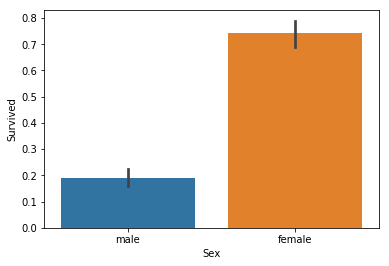

In [1315]:
sns.barplot(x="Sex",y="Survived",data=train)

In [1316]:
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 74.20382165605095


In [1317]:
print("Percentage of Male who survived:",train["Survived"][train["Sex"]=='male'].value_counts(normalize=True)[1]*100)

Percentage of Male who survived: 18.890814558058924


Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


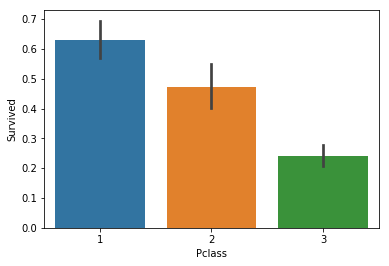

In [1318]:
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


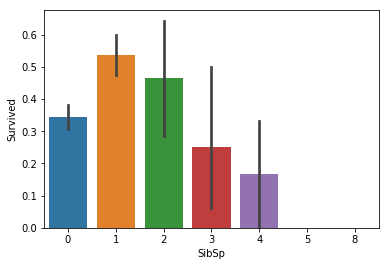

In [1319]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In [1320]:
SouthHampton = train[train["Embarked"]=='S'].shape[0]

In [1321]:
Cherborg = train[train["Embarked"]=='C'].shape[0]

In [1322]:
QueenTown = train[train["Embarked"]=='Q'].shape[0]

In [1323]:
print("SouthHampton:",SouthHampton,"\nCherborg",Cherborg,"\nQueenLAnd:",QueenTown)

SouthHampton: 644 
Cherborg 168 
QueenLAnd: 77


In [1324]:
combine=[train,test]

In [1325]:
for dataset in combine:
    dataset["Title"]=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [1326]:
pd.crosstab(train["Title"],train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [1327]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [1328]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [1329]:
mr_age = train[train["Title"] == 1]["Age"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["Age"].mode() #Student
mrs_age = train[train["Title"] == 3]["Age"].mode() #Adult
master_age = train[train["Title"] == 4]["Age"].mode() #Baby
royal_age = train[train["Title"] == 5]["Age"].mode() #Adult
rare_age = train[train["Title"] == 6]["Age"].mode() #Adult

In [1330]:
age_title_mapping = {1: int(mr_age[0]), 2: miss_age[0], 3: mrs_age[0], 4: master_age[0], 5: royal_age[0], 6: rare_age[0]}

In [1331]:
age_title_mapping

{1: 19, 2: 18.0, 3: 24.0, 4: 1.0, 5: 33.0, 6: 54.0}

In [1332]:
train["Age"] = train["Age"].fillna(train["Title"].map(age_title_mapping))

In [1333]:
train["Age"]=list(map(lambda x:int(x//10),train["Age"]))

In [1334]:
train=train.drop(["Name"],axis=1)

In [1335]:
s={"male":0,"female":1}

In [1336]:
train["Sex"]=train["Sex"].map(s)

In [1337]:
test["Sex"]=test["Sex"].map(s)

In [1338]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,2,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,1,2,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,1,3,1,0,113803,53.1000,C123,S,3
4,5,0,3,0,3,0,0,373450,8.0500,NaN,S,1


In [1339]:
train["Embarked"].groupby(train["Embarked"]).count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [1340]:
e={"S":0,"C":1,"Q":2}

In [1341]:
train["Embarked"]=train["Embarked"].map(e)
test["Embarked"]=test["Embarked"].map(e)

In [1342]:
d=dict(train["Fare"].groupby(train["Pclass"]).mean())

In [1343]:
train["Fare"] = train["Fare"].fillna(train["Pclass"].map(d))

In [1344]:
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

In [1345]:
train=train.drop(["Fare"],axis=1)

In [1346]:
test=test.drop(["Fare"],axis=1)

In [1347]:
combine=[train,test]

In [1348]:
for dataset in combine:
    dataset["CabinPool"]=dataset.Cabin.str.extract('([A-Za-z])',expand=False)

In [1349]:
train["CabinPool"].groupby(train["CabinPool"]).count()

CabinPool
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: CabinPool, dtype: int64

In [1350]:
from sklearn.preprocessing import LabelEncoder

In [1351]:
le=LabelEncoder()

In [1352]:
train["CabinPool"]=le.fit_transform(list(train["CabinPool"]))

In [1353]:
train["CabinPool"]=train["CabinPool"].fillna(0)

In [1354]:
test["CabinPool"]=test["CabinPool"].fillna('X')

In [1355]:
test["CabinPool"]=le.fit_transform(list(test["CabinPool"]))

In [1356]:
test = test.drop(["Name"],axis=1)

In [1357]:
test = test.drop(["Cabin"],axis=1)

In [1358]:
test = test.drop(["Ticket"],axis=1)

In [1359]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FareBand,CabinPool
0,892,3,0,34.5,0,0,2,1,1,7
1,893,3,1,47.0,1,0,0,3,1,7
2,894,2,0,62.0,0,0,2,1,2,7
3,895,3,0,27.0,0,0,0,1,2,7
4,896,3,1,22.0,1,1,0,3,2,7


In [1360]:
train=train.drop(["Cabin"],axis=1)

In [1361]:
train=train.drop(["Ticket"],axis=1)

In [1362]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FareBand,CabinPool
0,1,0,3,0,2,1,0,0.0,1,1,8
1,2,1,1,1,3,1,0,1.0,3,4,2
2,3,1,3,1,2,0,0,0.0,2,2,8
3,4,1,1,1,3,1,0,0.0,3,4,2
4,5,0,3,0,3,0,0,0.0,1,2,8


In [1363]:
predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FareBand,CabinPool
0,3,0,2,1,0,0.0,1,1,8
1,1,1,3,1,0,1.0,3,4,2
2,3,1,2,0,0,0.0,2,2,8
3,1,1,3,1,0,0.0,3,4,2
4,3,0,3,0,0,0.0,1,2,8


In [1364]:
train["Embarked"]=train["Embarked"].fillna(0)

In [1365]:
train=train.replace([np.inf, -np.inf], np.nan)

In [1366]:
train=train.fillna(train.mean())

In [1367]:
train = train.drop(["PassengerId"],axis=1)

In [1368]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = train.drop(['Survived'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [1369]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_val)
acc_logreg = round(accuracy_score(y_pred,y_val)*100,2)
print(acc_logreg)

80.2


In [1370]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

83.25


In [1371]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

79.19


In [1372]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

81.73


In [1373]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

83.76


In [1374]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

85.28


In [1375]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.74


In [1376]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

45.69


In [1377]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

82.74


In [1378]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.28
7,Decision Tree,83.76
0,Support Vector Machines,83.25
1,KNN,82.74
9,Gradient Boosting Classifier,82.74
5,Perceptron,81.73
2,Logistic Regression,80.20
6,Linear SVC,79.19
4,Naive Bayes,78.68
8,Stochastic Gradient Descent,45.69


In [1379]:
test=test.replace([np.inf, -np.inf], np.nan)

In [1380]:
test=test.fillna(1)

In [1381]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)